In [1]:
import os, sys; sys.path.append(os.path.abspath('../'))

import scipy.io
from inspector.rsa import ESM

In [2]:
data_dir = r'..\data\baseline'
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]

In [4]:
n_networks = 10

network_X = []
network_y = []

for f in data_files[:3]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    network_X.append(test_x)
    network_y.append(test_out)

In [4]:
len(network_X), len(network_y)

(3, 3)

In [5]:
network_X[0].shape, network_y[0].shape

((4, 50, 200, 300), (4, 50, 300))

In [6]:
network_X[1].shape, network_y[1].shape

((4, 50, 200, 300), (4, 50, 300))

In [7]:
# netrep_metric = ESM(verbose = True)
# ingestion_report = netrep_metric.ingest(network_X, network_y, preprcessed = True)
# energy_distance = netrep_metric.score()

In [8]:
x_1 = network_X[0]
x_2 = network_X[1]
x_3 = network_X[2]

# Make the time step the front!

In [9]:
x1_transposed = x_1.transpose((3, 0, 1, 2))
x2_transposed = x_2.transpose((3, 0, 1, 2))
x3_transposed = x_3.transpose((3, 0, 1, 2))

In [10]:
x1_transposed.shape

(300, 4, 50, 200)

In [11]:
len(x1_transposed)

300

In [12]:
distance_matrix_per_time_step = []

# for with tqdm

from tqdm import tqdm

for i in tqdm(range(10)):
    netrep_metric = ESM(verbose = False)
    ingestion_report = netrep_metric.ingest([x1_transposed[i], x2_transposed[i], x3_transposed[i]], [[],[],[]], preprcessed = True)
    energy_distance = netrep_metric.score()

    distance_matrix_per_time_step.append(energy_distance)

100%|██████████| 10/10 [02:21<00:00, 14.19s/it]


In [13]:
import numpy as np

In [14]:
time_dist = np.array(distance_matrix_per_time_step)

In [63]:
import seaborn as sns

def plot_distmat(distmat, title = "Distance Metric", out_path = None):
    '''Plot a distance matrix
    New method uses Seaborn to create a heatmap
    '''

    # Set the x and y ticks to the labels
    number_of_networks = len(distmat[0])
    labels = [f"Network {i+1}" for i in range(number_of_networks)]

    # Plot the heatmap using Seaborn
    ax = sns.heatmap(distmat, cmap='coolwarm', annot=True, fmt=".3f",
                     xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Distance'})
    ax.set_title(title)

    if out_path is not None:
        ax.figure.savefig(out_path)
    else:
        # Show the plot
        ax.show()

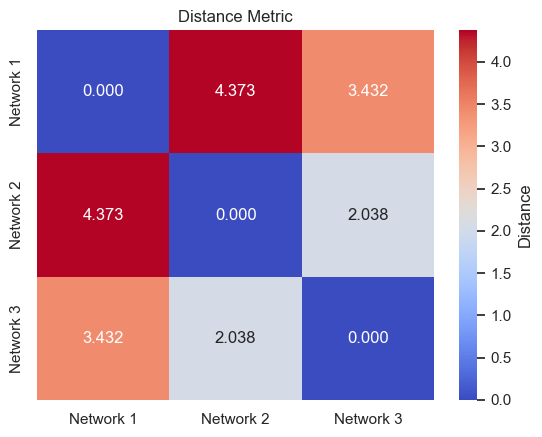

In [64]:
plot_distmat(time_dist[0], out_path="time_dist_1.png")

In [ ]:
time_dist.shape

(10, 3, 3)

In [65]:
# save the distance matrix
np.save("caches/Energy_dist_first_3_baseline.npy", time_dist)
# load the distance matrix
time_dist = np.load("caches/Energy_dist_first_3_baseline.npy")